<a href="https://colab.research.google.com/github/christabs27/Converting_and_uploading/blob/main/11_8_2_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lesson 11.8.2 Activity

In this activity, we’ll examine trends in the daily low temperature measured in Melbourne, Australia from 1981 to 1990.  We’ll model the relationship of temperatures over time using an autoregression model and attempt to create a seven-day low temperature forecast.

#Step 1: Download and save the `daily-min-temperatures.csv` dataset from the class materials  

* Make a note of where you saved the file on your computer.

#Step 2: Upload the `daily-min-temperatures.csv` dataset by running the following code block 

* When prompted, navigate to and select the `daily-min-temperatures.csv` dataset where you saved it on your computer.

In [1]:
#Step 2

from google.colab import files
temperatures = files.upload()

Saving daily-min-temperatures.csv to daily-min-temperatures.csv


#Step 3: Import necessary packages

```
!pip uninstall statsmodels

!pip install statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
```


In [2]:
#Step 3


!pip uninstall statsmodels

!pip install statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt



Found existing installation: statsmodels 0.13.2
Uninstalling statsmodels-0.13.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/statsmodels-0.13.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/statsmodels/*
Proceed (y/n)? n
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Step 4: Create a Pandas DataFrame from the CSV file
* Name the DataFrame `temperatures`
* In the `pd._read_csv` statement, add the arguments `header=0, index_col=0`.  This tells Python to use the date column as the index and that the column names are specified in the first row.
* Additionally, add the argument `parse_dates=True`.  This tells Pandas to expect the index column to contain dates.
* Print the first five observations of `temperatures`.  Note the kinds of data it contains.

In [8]:
#Step 4
temperatures = pd.read_csv('daily-min-temperatures.csv',  header=0, index_col=0, parse_dates=True)

temperatures.head(1)

,Temp
Date,
1981-01-01,20.7


#Step 5: Split the data into training, validation, and testing sets
* Run the following code block to create and print the length of `val`, `train`, `test`, and `temperatures`. Check the results to make sure that you aren't missing any observations.
* Because we want to see if we can predict a seven-day forecast, we should reserve the last seven days of the data as our test set and the second to last seven days as a validation set.
* Because the data is sorted in order, we can split the data based on the locations of the observations in the dataset.
* The test data are located in the last seven observations of the dataset.  
* The validation data are located in the second to last seven observations of the dataset.  
* The rest of the data is selected to be the training set.  






In [9]:

# Step 5
temperatures = temperatures.values

train = temperatures[1:len(temperatures)-13]
test = temperatures[len(temperatures)-7:]
val = temperatures[len(temperatures)-14:len(temperatures)-7]



#Step 6: Determine the correct order for the AR process
* Run `mod = ar_select_order(train, maxlag=30)` to determine the optimal lags for the AR model limited to 30 days.  Because we know the autocorrelation drops off quickly, and because we know our data is stationary in the short term, it doesn't make sense to consider lags longer than a month.
* Print the lags using `print(mod.ar_lags)`.
* What lag values are selected for the model?





In [10]:
#Step 6
mod = ar_select_order(train, maxlag=30)


**Step 6 Answer:**



#Step 7: Train the autoregression model and validate it using the validation set
* Run the following code block to print the predicted and actual temperature values for the validation data.  Note that we are specifying the lags returned to us in the previous step.
* The code block also prints the RMSE for the model.  On average, how far off is the model prediction from the actual temperature value?





predicted=15.806996, actual=17.200000
predicted=14.523739, actual=14.700000
predicted=13.964430, actual=15.400000
predicted=13.628527, actual=13.100000
predicted=13.452881, actual=13.200000
predicted=13.464096, actual=13.900000
predicted=13.617025, actual=10.000000
Validation RMSE: 1.588


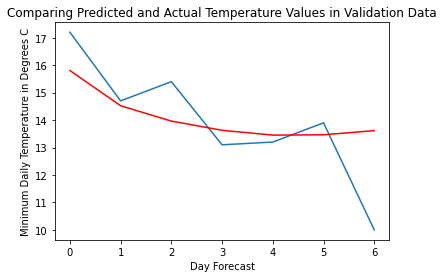

In [11]:
#Step 7


model = AutoReg(train, lags=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
model_fit = model.fit()

predictions = model_fit.predict(start=len(train), end=len(train)+len(val)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, actual=%f' % (predictions[i], val[i]))
rmse = sqrt(mean_squared_error(val, predictions))
print('Validation RMSE: %.3f' % rmse)
# plot results
plt.plot(val)
plt.plot(predictions, color='red')
plt.title('Comparing Predicted and Actual Temperature Values in Validation Data')
plt.ylabel('Minimum Daily Temperature in Degrees C')
plt.xlabel('Day Forecast')
plt.show()

**Step 7 Answer:**


#Step 8: Test the autoregression model using the test set.
* Run the following code block to print the predicted and actual temperature values for the test data.  
* The code block also prints the RMSE for the model.  On average, how far off is the model prediction from the actual temperature value?  





predicted=15.806996, actual=12.900000
predicted=14.523739, actual=14.600000
predicted=13.964430, actual=14.000000
predicted=13.628527, actual=13.600000
predicted=13.452881, actual=13.500000
predicted=13.464096, actual=15.700000
predicted=13.617025, actual=13.000000
Test RMSE: 1.406


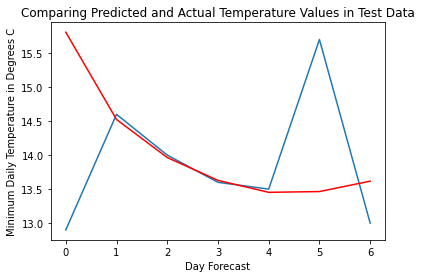

In [13]:
#Step 8


model = AutoReg(train, lags=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
model_fit = model.fit()

predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, actual=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.title('Comparing Predicted and Actual Temperature Values in Test Data')
plt.ylabel('Minimum Daily Temperature in Degrees C')
plt.xlabel('Day Forecast')
plt.show()

**Step 8 Answer:**
